In [2]:
import pandas as pd
train= pd.read_csv('korean-hate-speech/labeled/train.tsv' ,sep='\t')
dev= pd.read_csv('korean-hate-speech/labeled/dev.tsv' ,sep='\t')

In [3]:
train

,comments,contain_gender_bias,bias,hate
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False,none,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",False,none,none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True,gender,hate
...,...,...,...,...
7891,힘내세요~ 응원합니다!!,False,none,none
7892,힘내세요~~삼가 고인의 명복을 빕니다..,False,none,none
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,False,none,none
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,False,none,none


# 독립변수 처리

In [4]:
train = train[['comments','hate']]
train['hate'] = train['hate'].map({'none':0,'offensive':1,'hate':2})
dev = dev[['comments','hate']]
dev['hate'] = dev['hate'].map({'none':0,'offensive':1,'hate':2})

<ipython-input-4-4a9ecf198709>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['hate'] = train['hate'].map({'none':0,'offensive':1,'hate':2})


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
print('훈련용 리뷰의 개수 :', len(train))
print('테스트용 리뷰의 개수 :', len(dev))

훈련용 리뷰의 개수 : 7896
테스트용 리뷰의 개수 : 471


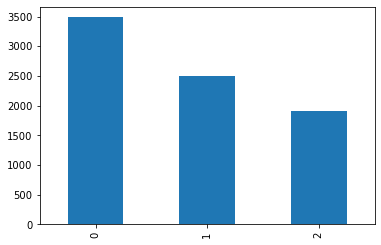

In [7]:
train['hate'].value_counts().plot(kind = 'bar')

# 불용어 제거 후 토큰화 작업

- ( , ) 도 추가
- ....은 의미 있을 수도 있어 제거 X

In [8]:
stopwords = ['(',')','도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '음', '면']

In [9]:
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

train['tokenized'] = train['comments'].apply(mecab.morphs)
train['tokenized'] = train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
dev['tokenized'] = dev['comments'].apply(mecab.morphs)
dev['tokenized'] = dev['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

<ipython-input-9-2317ec7bde5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['tokenized'] = train['comments'].apply(mecab.morphs)
<ipython-input-9-2317ec7bde5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['tokenized'] = train['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])


# 단어 및 길이 분포 확인

In [10]:
none_words = np.hstack(train[train.hate == 0]['tokenized'].values)
offensive_words = np.hstack(train[train.hate == 1]['tokenized'].values)
hate_words = np.hstack(train[train.hate == 2]['tokenized'].values)

In [11]:
none_words_count = Counter(none_words)
print(none_words_count.most_common(20))

[('.', 2634), ('?', 561), ('거', 431), ('..', 421), ('보', 400), ('있', 391), ('잘', 387), ('좋', 376), ('!', 358), ('는데', 352), ('나', 332), ('안', 320), ('같', 257), ('아', 254), ('너무', 252), ('없', 247), ('겠', 247), ('사람', 237), ('했', 235), ('~', 235)]


In [12]:
offensive_words_count = Counter(offensive_words)
print(offensive_words_count.most_common(20))

[('.', 2080), ('?', 830), ('거', 426), ('..', 351), ('나', 344), ('안', 342), ('있', 287), ('냐', 282), ('보', 275), ('없', 274), ('ㅋㅋ', 259), ('아', 232), ('어', 220), ('는데', 211), ('ㅋㅋㅋ', 211), ('사람', 205), ('여자', 204), ('로', 200), ('왜', 194), ('니', 192)]


In [13]:
hate_words_count = Counter(hate_words)
print(hate_words_count.most_common(20))

[('.', 1456), ('?', 607), ('거', 325), ('ㅋㅋ', 319), ('여자', 298), ('ㅋㅋㅋ', 288), ('냐', 272), ('나', 264), ('안', 244), ('있', 240), ('..', 227), ('보', 223), ('아', 221), ('니', 190), (',', 186), ('어', 176), ('남자', 176), ('없', 174), ('겠', 154), ('같', 153)]


In [14]:
train[train['hate']==1]['tokenized'].map(lambda x: len(x))

8       14
9       22
13      13
15      20
23       9
        ..
7859    53
7862     5
7872     6
7877    13
7882    12
Name: tokenized, Length: 2499, dtype: int64

none 리뷰의 평균 길이 : 13.952094090648307
offensive 리뷰의 평균 길이 : 15.990396158463385
hate 리뷰의 평균 길이 : 18.14965986394558


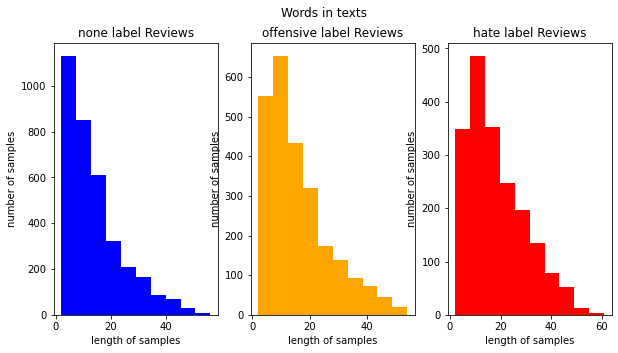

In [15]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
text_len = train[train['hate']==0]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='blue')
ax1.set_title('none label Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('none 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train[train['hate']==1]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='orange')
ax2.set_title('offensive label Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('offensive 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train[train['hate']==2]['tokenized'].map(lambda x: len(x))
ax3.hist(text_len, color='red')
ax3.set_title('hate label Reviews')
fig.suptitle('Words in texts')
ax3.set_xlabel('length of samples')
ax3.set_ylabel('number of samples')
print('hate 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [16]:
train_data, test_data = train_test_split(train, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 5922
테스트용 리뷰의 개수 : 1974


In [17]:
train_data.hate.value_counts()

0    2635
1    1859
2    1428
Name: hate, dtype: int64

In [18]:
test_data.hate.value_counts()

0    851
1    640
2    483
Name: hate, dtype: int64

In [19]:
from tensorflow.keras.utils import to_categorical
dataset_y = to_categorical(train_data['hate'])
dataset_y = np.array(dataset_y, dtype=np.int32)
print(dataset_y)

[[1 0 0]
 [0 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [0 1 0]]


In [20]:
test_y = to_categorical(test_data['hate'])
test_y = np.array(test_y, dtype=np.int32)
print(test_y)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 0 1]]


In [21]:
X_train = train_data['tokenized'].values
y_train = dataset_y
X_test= test_data['tokenized'].values
y_test = test_y

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5922,), (5922, 3), (1974,), (1974, 3))

# 정수 인코딩

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [23]:
tokenizer.word_counts

OrderedDict([('이렇게', 75),
             ('재', 23),
             ('밋', 6),
             ('수', 189),
             ('있', 698),
             ('다니', 58),
             ('갠', 5),
             ('적', 214),
             ('으로', 351),
             ('이런', 130),
             ('스타일', 24),
             ('싸', 18),
             ('보인다', 17),
             ('.', 4670),
             ('....', 53),
             ('스카이', 5),
             ('캐슬', 6),
             ('그런', 69),
             ('어울리', 20),
             ('...', 152),
             ('이건', 22),
             ('술집', 8),
             ('여자', 438),
             ('같', 441),
             ('나', 696),
             ('보', 677),
             ('기', 344),
             ('불편', 34),
             ('함', 104),
             ('?', 1529),
             ('그래도', 53),
             ('너', 72),
             ('죄책감', 1),
             ('부끄러워', 2),
             ('할', 238),
             ('줄', 110),
             ('아', 523),
             ('는구나', 33),
             ('송혜교', 27),
             ('측'

In [24]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 11893
등장 빈도가 1번 이하인 희귀 단어의 수: 6259
단어 집합에서 희귀 단어의 비율: 52.62759606491213
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.743231450457341


In [25]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 5636


In [26]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [27]:
X_train[0]

[185, 607, 1775, 67, 6, 248]

# 패딩

리뷰의 최대 길이 : 61
리뷰의 평균 길이 : 15.673590003377237


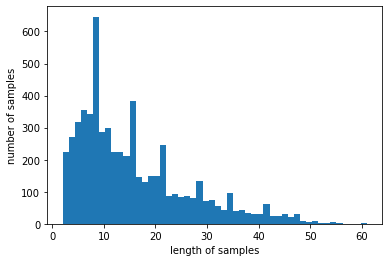

In [28]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [30]:
max_len = 61
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 61 이하인 샘플의 비율: 100.0


In [31]:
X_train

[[185, 607, 1775, 67, 6, 248],
 [2036,
  55,
  33,
  106,
  576,
  756,
  787,
  2,
  272,
  2037,
  1776,
  211,
  55,
  576,
  693,
  2,
  90,
  639,
  1439,
  23,
  22],
 [7, 9, 34, 426, 136, 3],
 [273,
  199,
  1,
  3846,
  47,
  130,
  11,
  438,
  2,
  522,
  2933,
  204,
  1777,
  1778,
  26,
  73,
  1,
  122,
  2],
 [14, 62, 343, 12, 27, 694, 1, 1126, 7, 2934, 358, 2038, 290, 55, 290],
 [39,
  2406,
  79,
  64,
  82,
  1,
  2,
  169,
  163,
  82,
  40,
  414,
  205,
  577,
  92,
  921,
  144,
  1,
  608,
  19,
  2406,
  63,
  76,
  146,
  2,
  1,
  63,
  206,
  9,
  186,
  82,
  547,
  873,
  11,
  874],
 [733, 133, 51, 200, 199, 110, 19, 21, 12, 2, 5, 125, 1779, 16],
 [128, 3847, 129, 2407, 20, 2407, 129, 3848],
 [1,
  1563,
  640,
  11,
  1780,
  3849,
  80,
  8,
  29,
  28,
  1127,
  1046,
  6,
  2039,
  2408,
  4,
  26,
  16,
  212,
  979,
  1047,
  2040,
  1048,
  480,
  1,
  354,
  317,
  507,
  1,
  140,
  383,
  32,
  234,
  36,
  44,
  42,
  18],
 [1, 1],
 [128,
  108,

In [32]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [31]:
X_train

array([[   0,    0,    0, ...,   67,    6,  248],
       [   0,    0,    0, ..., 1439,   23,   22],
       [   0,    0,    0, ...,  426,  136,    3],
       ...,
       [   0,    0,    0, ...,  136,   77, 2806],
       [   0,    0,    0, ...,  212,    2,  212],
       [   0,    0,    0, ...,  239,    1,   10]])

In [32]:
X_train[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,  273,  199,
          1, 3846,   47,  130,   11,  438,    2,  522, 2933,  204, 1777,
       1778,   26,   73,    1,  122,    2])

In [33]:
train_list = []
for i, val in enumerate(X_train):
    train_list.append(list((val-np.mean(val)) / (np.max(val)-np.min(val))))

# 모델 구축

In [33]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(3, activation='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         563600    
_________________________________________________________________
batch_normalization (BatchNo (None, None, 100)         400       
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 200)         160800    
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 200)         800       
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               2

In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, BatchNormalization
import tensorflow as tf
# 모델 구조 정의하기
input = tf.keras.layers.Input(shape=(max_len,))
net = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64)(input)
net = tf.keras.layers.LSTM(units=64, return_sequences=True, activation='relu')(net) 
net = tf.keras.layers.LSTM(units=64, activation='relu')(net) 
net = tf.keras.layers.Dense(units=3, activation='softmax')(net)
model = tf.keras.models.Model(inputs=input, outputs=net)

model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 61)]              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 61, 64)            360704    
_________________________________________________________________
lstm_11 (LSTM)               (None, 61, 64)            33024     
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 426,947
Trainable params: 426,947
Non-trainable params: 0
_________________________________________________________________


In [44]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 1.0499 - acc: 0.4469
Epoch 00001: val_acc improved from -inf to 0.44051, saving model to best_model.h5
75/75 [==============================] - 4s 52ms/step - loss: 1.0499 - acc: 0.4469 - val_loss: 0.9972 - val_acc: 0.4405
Epoch 2/100
75/75 [==============================] - ETA: 0s - loss: 0.8849 - acc: 0.5609- ETA: 1s - loss: 0.
Epoch 00002: val_acc improved from 0.44051 to 0.54768, saving model to best_model.h5
75/75 [==============================] - 4s 47ms/step - loss: 0.8849 - acc: 0.5609 - val_loss: 0.9304 - val_acc: 0.5477
Epoch 3/100
74/75 [============================>.] - ETA: 0s - loss: 0.8046 - acc: 0.6294
Epoch 00003: val_acc improved from 0.54768 to 0.55274, saving model to best_model.h5
75/75 [==============================] - 3s 46ms/step - loss: 0.8047 - acc: 0.6293 - val_loss: 0.9398 - val_acc: 0.5527
Epoch 4/100
75/75 [==============================] - ETA: 0s - loss: 0.6460 - acc: 0.7178
Epoch 00

KeyboardInterrupt: 

In [54]:
# 모델 구조 정의하기
model = Sequential()
model.add(Embedding(vocab_size+1, 64, input_length=max_len))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(64,return_sequences=True, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(64, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
          
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 61, 64)            360768    
_________________________________________________________________
batch_normalization_3 (Batch (None, 61, 64)            256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 61, 64)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 61, 64)            33024     
_________________________________________________________________
batch_normalization_4 (Batch (None, 61, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 61, 64)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 64)               

In [55]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

Epoch 1/100
74/75 [============================>.] - ETA: 0s - loss: 1.0770 - acc: 0.4326
Epoch 00001: val_acc improved from -inf to 0.43713, saving model to best_model.h5
75/75 [==============================] - 5s 64ms/step - loss: 1.0769 - acc: 0.4328 - val_loss: 1.0915 - val_acc: 0.4371
Epoch 2/100
74/75 [============================>.] - ETA: 0s - loss: 0.9251 - acc: 0.5486
Epoch 00002: val_acc did not improve from 0.43713
75/75 [==============================] - 4s 55ms/step - loss: 0.9249 - acc: 0.5487 - val_loss: 1.0938 - val_acc: 0.3857
Epoch 3/100
74/75 [============================>.] - ETA: 0s - loss: 0.7200 - acc: 0.6710
Epoch 00003: val_acc did not improve from 0.43713
75/75 [==============================] - 4s 59ms/step - loss: 0.7199 - acc: 0.6711 - val_loss: 1.0892 - val_acc: 0.4059
Epoch 4/100
74/75 [============================>.] - ETA: 0s - loss: 0.5512 - acc: 0.7625
Epoch 00004: val_acc improved from 0.43713 to 0.49198, saving model to best_model.h5
75/75 [======

Epoch 32/100
74/75 [============================>.] - ETA: 0s - loss: 0.0320 - acc: 0.9890
Epoch 00032: val_acc did not improve from 0.55274
75/75 [==============================] - 7s 95ms/step - loss: 0.0330 - acc: 0.9888 - val_loss: 3.9001 - val_acc: 0.5451
Epoch 33/100
74/75 [============================>.] - ETA: 0s - loss: 0.0570 - acc: 0.9831
Epoch 00033: val_acc did not improve from 0.55274
75/75 [==============================] - 9s 118ms/step - loss: 0.0569 - acc: 0.9831 - val_loss: 2.8612 - val_acc: 0.5460
Epoch 34/100
74/75 [============================>.] - ETA: 0s - loss: 0.0356 - acc: 0.9886
Epoch 00034: val_acc did not improve from 0.55274
75/75 [==============================] - 9s 118ms/step - loss: 0.0356 - acc: 0.9886 - val_loss: 3.2739 - val_acc: 0.5468
Epoch 35/100
75/75 [==============================] - ETA: 0s - loss: 0.0285 - acc: 0.9922
Epoch 00035: val_acc did not improve from 0.55274
75/75 [==============================] - 8s 109ms/step - loss: 0.0285 - ac

Epoch 63/100
75/75 [==============================] - ETA: 0s - loss: 0.0243 - acc: 0.9920
Epoch 00063: val_acc did not improve from 0.56118
75/75 [==============================] - 8s 113ms/step - loss: 0.0243 - acc: 0.9920 - val_loss: 3.5673 - val_acc: 0.5418
Epoch 64/100
74/75 [============================>.] - ETA: 0s - loss: 0.0186 - acc: 0.9941
Epoch 00064: val_acc did not improve from 0.56118
75/75 [==============================] - 9s 116ms/step - loss: 0.0185 - acc: 0.9941 - val_loss: 3.9010 - val_acc: 0.5359
Epoch 65/100
75/75 [==============================] - ETA: 0s - loss: 0.0135 - acc: 0.9951
Epoch 00065: val_acc did not improve from 0.56118
75/75 [==============================] - 10s 135ms/step - loss: 0.0135 - acc: 0.9951 - val_loss: 3.9472 - val_acc: 0.5451
Epoch 66/100
74/75 [============================>.] - ETA: 0s - loss: 0.0108 - acc: 0.9962- ETA: 3s - l
Epoch 00066: val_acc did not improve from 0.56118
75/75 [==============================] - 10s 135ms/step - l

74/75 [============================>.] - ETA: 0s - loss: 0.0063 - acc: 0.9983
Epoch 00093: val_acc did not improve from 0.56118
75/75 [==============================] - 7s 94ms/step - loss: 0.0063 - acc: 0.9983 - val_loss: 4.7938 - val_acc: 0.5333
Epoch 94/100
74/75 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.9979
Epoch 00094: val_acc did not improve from 0.56118
75/75 [==============================] - 4s 54ms/step - loss: 0.0062 - acc: 0.9979 - val_loss: 4.7175 - val_acc: 0.5274
Epoch 95/100
75/75 [==============================] - ETA: 0s - loss: 0.0075 - acc: 0.9970
Epoch 00095: val_acc did not improve from 0.56118
75/75 [==============================] - 5s 71ms/step - loss: 0.0075 - acc: 0.9970 - val_loss: 4.7716 - val_acc: 0.5376
Epoch 96/100
74/75 [============================>.] - ETA: 0s - loss: 0.0154 - acc: 0.9956
Epoch 00096: val_acc did not improve from 0.56118
75/75 [==============================] - 5s 71ms/step - loss: 0.0154 - acc: 0.9956 - val_

NameError: name 'x_test' is not defined

### 1-D CNN

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = Sequential()
model.add(Embedding(vocab_size, 256))
model.add(Dropout(0.3))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [56]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[mc], batch_size=64, validation_split=0.2)

Epoch 1/100
75/75 [==============================] - ETA: 0s - loss: 1.0745 - acc: 0.4433
Epoch 00001: val_acc improved from -inf to 0.43713, saving model to best_model.h5
75/75 [==============================] - 5s 61ms/step - loss: 1.0745 - acc: 0.4433 - val_loss: 1.0737 - val_acc: 0.4371
Epoch 2/100
74/75 [============================>.] - ETA: 0s - loss: 1.0708 - acc: 0.4470
Epoch 00002: val_acc did not improve from 0.43713
75/75 [==============================] - 6s 80ms/step - loss: 1.0708 - acc: 0.4469 - val_loss: 1.0788 - val_acc: 0.4371
Epoch 3/100
74/75 [============================>.] - ETA: 0s - loss: 1.0684 - acc: 0.4470
Epoch 00003: val_acc did not improve from 0.43713
75/75 [==============================] - 5s 73ms/step - loss: 1.0683 - acc: 0.4471 - val_loss: 1.0725 - val_acc: 0.4371
Epoch 4/100
74/75 [============================>.] - ETA: 0s - loss: 1.0696 - acc: 0.4468
Epoch 00004: val_acc did not improve from 0.43713
75/75 [==============================] - 4s 56ms

Epoch 32/100
74/75 [============================>.] - ETA: 0s - loss: 1.0671 - acc: 0.4468- ETA: 1s - loss:
Epoch 00032: val_acc did not improve from 0.43713
75/75 [==============================] - 6s 74ms/step - loss: 1.0670 - acc: 0.4469 - val_loss: 1.0700 - val_acc: 0.4371
Epoch 33/100
74/75 [============================>.] - ETA: 0s - loss: 1.0670 - acc: 0.4468
Epoch 00033: val_acc did not improve from 0.43713
75/75 [==============================] - 5s 73ms/step - loss: 1.0669 - acc: 0.4469 - val_loss: 1.0702 - val_acc: 0.4371
Epoch 34/100
74/75 [============================>.] - ETA: 0s - loss: 1.0665 - acc: 0.4470
Epoch 00034: val_acc did not improve from 0.43713
75/75 [==============================] - 4s 56ms/step - loss: 1.0665 - acc: 0.4469 - val_loss: 1.0701 - val_acc: 0.4371
Epoch 35/100
74/75 [============================>.] - ETA: 0s - loss: 1.0674 - acc: 0.4470
Epoch 00035: val_acc did not improve from 0.43713
75/75 [==============================] - 7s 90ms/step - los

74/75 [============================>.] - ETA: 0s - loss: 1.0668 - acc: 0.4468
Epoch 00094: val_acc did not improve from 0.43713
75/75 [==============================] - 7s 95ms/step - loss: 1.0667 - acc: 0.4469 - val_loss: 1.0701 - val_acc: 0.4371
Epoch 95/100
74/75 [============================>.] - ETA: 0s - loss: 1.0665 - acc: 0.4468
Epoch 00095: val_acc did not improve from 0.43713
75/75 [==============================] - 4s 58ms/step - loss: 1.0665 - acc: 0.4469 - val_loss: 1.0702 - val_acc: 0.4371
Epoch 96/100
74/75 [============================>.] - ETA: 0s - loss: 1.0665 - acc: 0.4470
Epoch 00096: val_acc did not improve from 0.43713
75/75 [==============================] - 6s 77ms/step - loss: 1.0665 - acc: 0.4469 - val_loss: 1.0702 - val_acc: 0.4371
Epoch 97/100
74/75 [============================>.] - ETA: 0s - loss: 1.0663 - acc: 0.4470- ETA: 0s - loss: 1.0655 - 
Epoch 00097: val_acc did not improve from 0.43713
75/75 [==============================] - 6s 78ms/step - loss: 

In [227]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

62/62 [==============================] - 1s 13ms/step - loss: 4.7960 - acc: 0.4311
테스트 정확도: 0.4311


In [106]:
preds = loaded_model.predict(X_test)
preds

array([[0.39774117, 0.4180528 , 0.18420602],
       [0.93720895, 0.05255724, 0.01023376],
       [0.53255975, 0.3266842 , 0.14075604],
       ...,
       [0.27636996, 0.466064  , 0.2575661 ],
       [0.2051393 , 0.4949639 , 0.29989678],
       [0.39454758, 0.3854387 , 0.22001368]], dtype=float32)

# 모델 평가 참고 

- https://ayoteralab.tistory.com/entry/Iris-dataset-classification-with-Keras?category=873956

In [29]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.show()

NameError: name 'history' is not defined

NameError: name 'dataset' is not defined

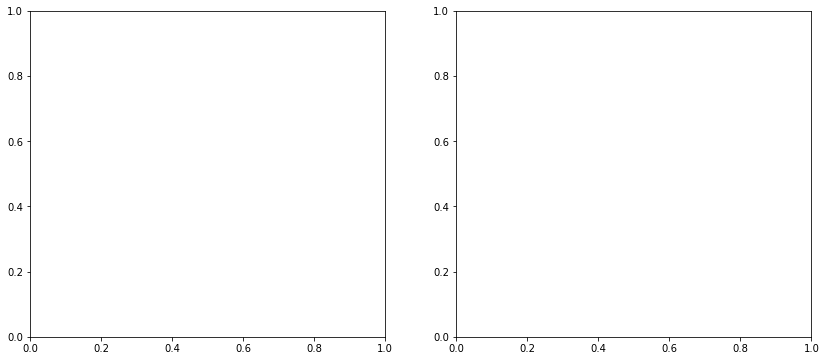

In [108]:
f, ax = plt.subplots(1, 2, figsize=(14,6))
ax[0].scatter(dataset.data[:,0], dataset.data[:,1], c=dataset.target)
ax[0].set_title('scatter with Sepal')
ax[1].scatter(dataset.data[:,2], dataset.data[:,3], c=dataset.target)
ax[1].set_title('scatter with Petal')
plt.show()